# LAB 1
All the code and explainations are given in this notebook.

# Task 1

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.optimize import root

interval = (2.8, 4)  # start, end
accuracy = 0.0001
reps = 600  # number of repetitions
numtoplot = 200
a = 1e-5

lims = []
lims2 = [] # initialize for the plot with perturbations

def perturbation(x):
    return a*x**4

for r in tqdm(np.arange(interval[0], interval[1], accuracy)):
    temp_lims = []
    temp_lims2 = [] # initialize temp lists for storing data
    initial_val = np.random.rand()
    temp_lims.append(initial_val)
    temp_lims2.append(initial_val + perturbation(initial_val)) # creating the same initial condition as the perturbed version
    
    for i in range(reps-1):
        val = r*temp_lims[i]*(1-temp_lims[i])
        temp_lims.append(val)
        temp_lims2.append(val + perturbation(val)) # store values with perturbation
    
    lims.append(temp_lims)
    lims2.append(temp_lims2) # store temp lists in main lists

  0%|          | 0/12001 [00:00<?, ?it/s]

More optimized plotting

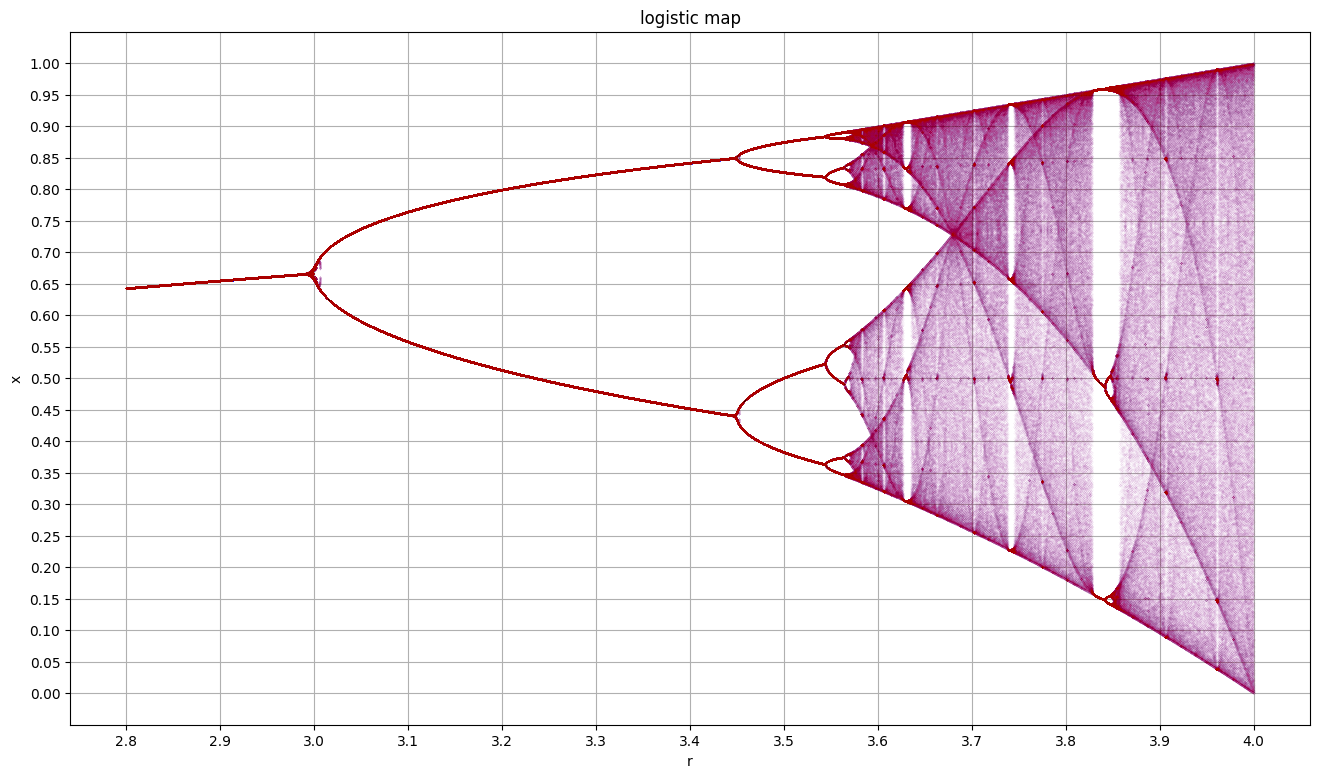

In [151]:
fig, biax = plt.subplots(figsize=(16, 9))

# convert lims and lims2 to numpy arrays
lims_arr = np.array(lims)
lims2_arr = np.array(lims2)

# create arrays of x-coordinates and y-coordinates for unperturbed data
r_vals = np.arange(interval[0], interval[1], accuracy)
x_vals = lims_arr[:, -numtoplot:]
r_broadcasted = np.broadcast_to(r_vals[:, None], (len(r_vals), numtoplot))
biax.plot(r_broadcasted.flatten(), x_vals.flatten(), 'b.', markersize=.02)

# create arrays of x-coordinates and y-coordinates for perturbed data
x2_vals = lims2_arr[:, -numtoplot:]
biax.plot(r_broadcasted.flatten(), x2_vals.flatten(), 'r.', markersize=.02)

biax.set(xlabel='r', ylabel='x', title='logistic map')
plt.xticks(np.arange(interval[0], interval[1], 0.1))
plt.yticks(np.arange(0, 1+0.05, 0.05))
plt.grid()
plt.show()

# Task 2
Compute the Feigenbaum constants $\alpha\approx 2.5029$ and $\beta\approx4.6692$
for both maps. $\alpha$ is defined as ...
$\beta = \lim_{n\rightarrow \infty} \frac{a_{n-1} - a_{n-2}}{a_n - a_{n-1}}$ where $a_n$ is 

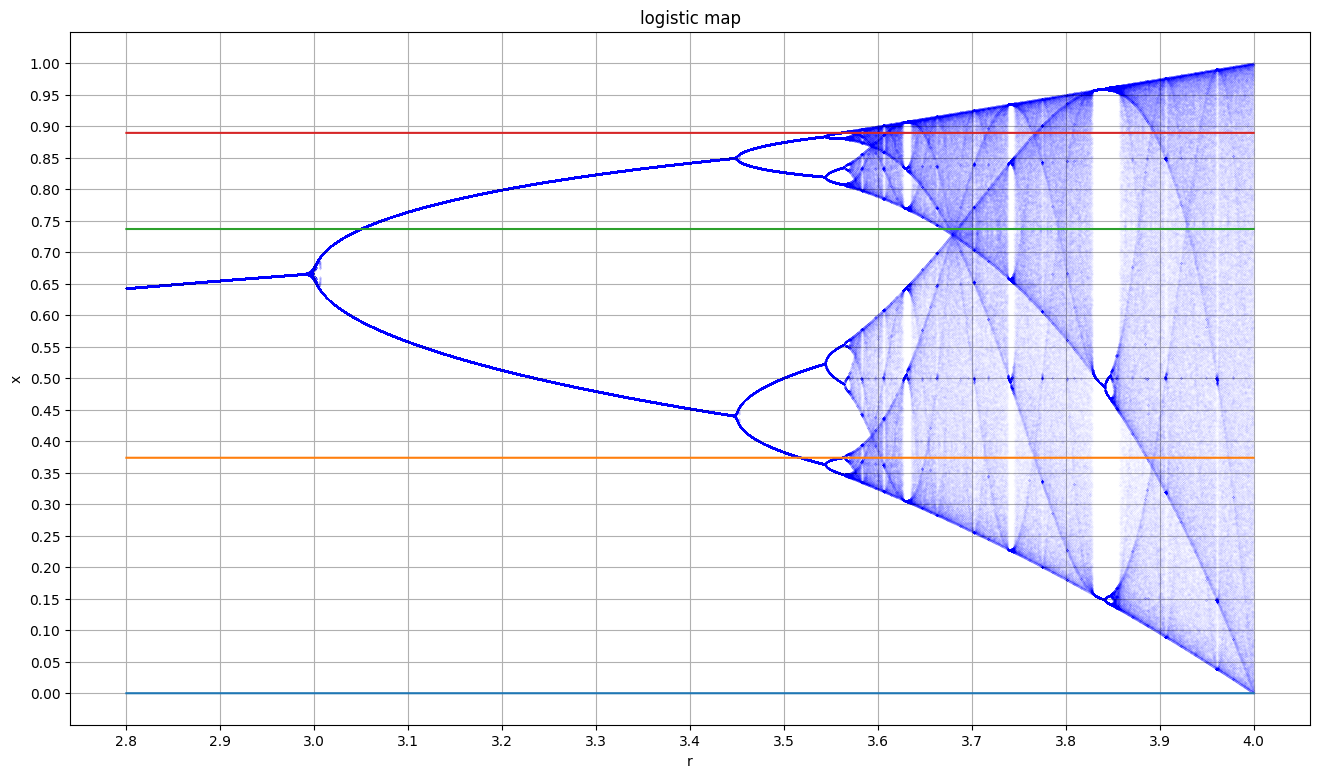

In [162]:
def FP(r): # Function for finding the fixed points to a period two logistic map
    
    def f(x, r):
        return r * x * (1 - x)
        
    return root(lambda x: f(f(x, r), r) - x, x0=np.linspace(0, 1, 100), method='hybr', tol=1e-10) 
    

fig, biax = plt.subplots(figsize=(16, 9))

# convert lims and lims2 to numpy arrays
lims_arr = np.array(lims)
lims2_arr = np.array(lims2)

# create arrays of x-coordinates and y-coordinates for unperturbed data
r_vals = np.arange(interval[0], interval[1], accuracy)
x_vals = lims_arr[:, -numtoplot:]
r_broadcasted = np.broadcast_to(r_vals[:, None], (len(r_vals), numtoplot))
biax.plot(r_broadcasted.flatten(), x_vals.flatten(), 'b.', markersize=.02)

# plotting the FP that corresponds to some bifurcation parameter
result = FP(3.8)["x"] # computing the fiex points given some argument r
plt.plot(np.arange(interval[0], interval[1], accuracy),
         np.repeat(np.unique(result.round(7))[...,None], 
                   int((interval[1] - interval[0]) / accuracy + 1), axis=1).T)

biax.set(xlabel='r', ylabel='x', title='logistic map')
plt.xticks(np.arange(interval[0], interval[1], 0.1))
plt.yticks(np.arange(0, 1+0.05, 0.05))
plt.grid()
plt.show()

In [168]:
def FP(r): # Function for finding the fixed points to a period two logistic map
    
    def f(x, r):
        return r * x * (1 - x)
        
    return root(lambda x: f(f(f(x, r), r), r) - x, x0=np.linspace(0, 1, 100), method='hybr', tol=1e-10) 
result = FP(3.5)["x"] 
np.unique(result)

array([0.        , 0.01008817, 0.02016871, 0.03023065, 0.04028579,
       0.05060619, 0.06083673, 0.07084409, 0.08091142, 0.09099513,
       0.10108595, 0.11118088, 0.12127894, 0.13138019, 0.14148575,
       0.15159892, 0.16172966, 0.171922  , 0.19186225, 0.2018498 ,
       0.21199229, 0.22210758, 0.23221156, 0.24230905, 0.25240164,
       0.26248952, 0.27257199, 0.28264733, 0.29271225, 0.29543051,
       0.30276082, 0.31278909, 0.32301175, 0.3433704 , 0.3503772 ,
       0.35356967, 0.3743978 , 0.38434276, 0.39434387, 0.4043861 ,
       0.41444948, 0.424526  , 0.43461175, 0.44470473, 0.45480402,
       0.46490943, 0.47502137, 0.48514088, 0.49526988, 0.50541185,
       0.51405839, 0.51557242, 0.52574096, 0.53566921, 0.54363122,
       0.54589086, 0.55041724, 0.56875003, 0.58519625, 0.59636422,
       0.60642576, 0.61643361, 0.62646679, 0.6365184 , 0.6465823 ,
       0.65665469, 0.66673306, 0.67681569, 0.68690134, 0.69698915,
       0.70707845, 0.71716873, 0.72725956, 0.73735056, 0.74744

In [164]:
from scipy.optimize import root_scalar

def FP(r):
    def f(x, r):
        return r * x * (1 - x)

    def g(x):
        return f(f(x, r), r) - x

    # Initialize list to store roots
    roots = []
    
    # Set initial interval to search for roots
    x0 = 0.1
    x1 = 0.9
    
    while True:
        # Find root within interval [x0, x1]
        res = root_scalar(g, bracket=[x0, x1], method='bisect')
        
        # If a root is found, append it to the list
        if res.converged:
            roots.append(res.root)
        else:
            break
        
        # Set new interval to search for next root
        x0 = x1
        x1 = 1 - x0
        
        # If interval is too small, break out of loop
        if abs(x1 - x0) < 1e-10:
            break
    
    return roots

FP(3.8)

KeyboardInterrupt: 